# Hello World Notebook
Introduction to Jupyter Noytebook based on Python. First small steps - getting going.

Note: Click on the little keyboard icon to bring up the list of shortcut keys.

Create a new cell of type *code*. Type `print("hello world")` into the new cell. Run the cell - from the toolbar or with CTRL+enter. 

Create a new cell of type Markdown. Cells of this type are used to add text (with possibly nice looking layout) to the notebook - to make notes about what you are doing. 

Markdown syntax (see [Cheatsheet](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet)) supports useful things such as headings (#, ##, ###), bullet lists, code snippets, italic and bold, strikethrough and more. Additionally: we can use HTML syntax in markdown cells.  

Enter the following in the cell, wrap the code snippet in backticks, and execute the cell:

```
## Note to Self
Create a new cell of type Markdown. Cells of this type are used to add text (with possibly nice looking layout) to the notebook - to make notes about what you are doing. Here is a code snippet:
`print("hello world")` 

Markdown syntax (see [Cheatsheet](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet)) supports useful things such as headings (#, ##, ###), bullet lists, code snippets, italic and bold, strikethrough and more. Additionally: we can use HTML syntax in markdown cells.  

Remember:
* markdown is handy
* for quick notes
* that look quite nice
```

Create another new cell of type *code*. Type (or copy & paste) the following code:
```
txt = "hello world"
print(txt)
```

Create one more cell and enter these two lines of code:
```
txt+="!!!"
print(txt)
```
Variable *txt* was defined in the previous cell and is still hanging around in the global notebook context to be used in the next cell. 

Create a function called *welcome* like this
```
def welcome(name):
    print("welcome",name,"!!!")
```
then add this line:
```
welcome("John")  
```
and execute the cell.

Create a new cell of type *code* and enter the following code:
```
names = ["John","Mary","Nicole","Paul","Sylvia"]
for name in names:
    welcome(name)
```
and execute the cell.

This gives you some idea regarding variables, functions, lists and loops.

## Loading Data into a Pandas Dataframe
Next, we will make things a little bit more interesting and serious. We will load a data set from a CVS file (comma separated values file) into a Pandas Data Frame - and then leverage the power of Pandas to explore the data.

For those of you who have a background with Oracle Database, this data set is likely to look familiar.

Execute the next cell to load the data from the file system into the Pandas Data Frame.

In [1]:
# initialize environment by installing some Python3 libraries through pip
%pip install pandas
%pip install matplotlib


In [1]:
import pandas as pd
# read csv file into Pandas Data Frame, using a semi colon is separator
hr= pd.read_csv("https://raw.githubusercontent.com/lucasjellema/DOAG2020-DataWranglingWithJupyterNotebooks/main/HelloWorldNotebook/emp.csv",sep=';')
#show first five rows in the dataframe
hr.head(5)

,empno,ename,job,mgr,hiredate,sal,comm,deptno
0,7369,SMITH,CLERK,7902.0,13/06/1993,800.0,0.0,20
1,7499,ALLEN,SALESMAN,7698.0,15/08/1998,1600.0,300.0,30
2,7521,WARD,SALESMAN,7698.0,26/03/1996,1250.0,500.0,30
3,7566,JONES,MANAGER,7839.0,31/10/1995,2975.0,NaN,20
4,7698,BLAKE,MANAGER,7839.0,11/06/1992,2850.0,NaN,30


It is easy to inspect the data frame a little. You can use the following approaches:
* `hr.describe` or ``
* `hr.dtypes`
* `hr.shape`
* `hr['job'].value_counts()`

Create a new cell and try out these expressions.

## Cross Table
A powerful mechanism in Pandas is the crosstab - a quick overview of the incidence of records along two dimensions. For example, to find the number of job occurrences per department, create a new cell with this code: `pd.crosstab(hr['job'], hr['deptno'])` and execute the cell. 

The *hiredate* column contains a string that we can interpret as a date. To make it a *date* for Python, we need to do an explicit conversion.

Copy and paste this line of code to the next cell - and execute the cell:
```
hr['hiredate'] = pd.to_datetime(hr['hiredate'])
``` 

In [2]:
hr['hiredate'] = pd.to_datetime(hr['hiredate'])

Now we can check out the values in the recast *hiredate* column using this statement: `hr['hiredate']`. We can also use the year component from the hiredate to create a cross table of year vs department number, using this statement:

```
pd.crosstab(hr['hiredate'].dt.year, hr['deptno'])
```

In [3]:
pd.crosstab(hr['hiredate'].dt.year, hr['deptno'])

deptno,10,20,30
hiredate,,,
1990,1,0,0
1992,0,0,1
1993,1,1,0
1995,0,1,1
1996,0,1,1
1997,0,1,0
1998,0,0,2
1999,0,1,0
2000,1,0,1


## Aggregations and Grouping  By
We can perform various aggegration operations (sum, size, max, min, avg,...) and group by one or more columns. For example, the maximum salary in each department: `hr.groupby(['deptno'])['sal'].max()`.

In [4]:
hr.groupby(['deptno'])['sal'].max()

deptno
10    5000.0
20    3000.0
30    2850.0
Name: sal, dtype: float64

Let's calculate the salary sum per department and per job, using a cell with this statement:
`hr.groupby(['deptno','job'])['sal'].sum()`

In [5]:
hr.groupby(['deptno','job'])['sal'].sum()

deptno  job      
10      CLERK        1300.0
        MANAGER      2450.0
        PRESIDENT    5000.0
20      ANALYST      6000.0
        CLERK        1900.0
        MANAGER      2975.0
30      CLERK         950.0
        MANAGER      2850.0
        SALESMAN     5600.0
Name: sal, dtype: float64

## Charts - Step One
Creating charts is easily done too. 
Add the following line at the end of the next cell - and execute the cell:
```
ax = hr.groupby(['deptno'])['sal'].sum().plot.bar()
```
This create a simple barchart for the total salary sums of the three departments.

Add this line instead at the end of the next call, to create a stacked barchart:
```
ax = hr.groupby(['deptno','job'])['sal'].sum().unstack('job').plot.bar(stacked=True)
```

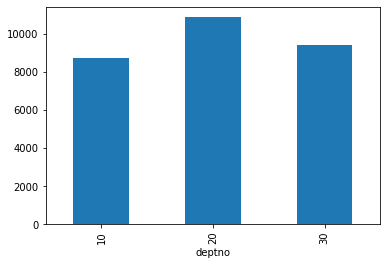

In [10]:
import matplotlib.pyplot as plt

# after this line, add the line to draw the chart 
ax = hr.groupby(['deptno'])['sal'].sum().plot.bar()



## Filtering and Querying
Find all Clerks in our data frame using this expression:
```
hr[hr['job']=='CLERK']
```

The filter logic can easily be expanded to search for CLERKs who earn over 800:
```
hr[ (hr['sal']>800) & (hr['job']=='CLERK') ]
```


In [11]:
hr[ (hr['sal']>800) & (hr['job']=='CLERK') ]

,empno,ename,job,mgr,hiredate,sal,comm,deptno
9,7876,ADAMS,CLERK,7788.0,1999-04-06,1100.0,NaN,20
10,7900,JAMES,CLERK,7698.0,2000-06-23,950.0,NaN,30
11,7934,MILLER,CLERK,7782.0,2000-01-21,1300.0,NaN,10


Selecting records from data frame can be more advanced still. For example, to select all records that satisfy a certain condition, we can first find all *indexes* for records that satisfy that condition and use those indexes to retrieve the full records.

For example, to find all employees from *hr* who are either CLERK or ANALYST we can take the expression
```
hr['job'].isin(['CLERK','ANALYST'])
```
that returns an array of booleans - indicating for each index of the data frame whether the row at that index satisfies the condition or not.

We can use this result to return the employee records. The next expression returns the records from hr that have the indexes corresponding to the result from the previous expression. That is a roundabout way of saying that we get the rows we want.

```
hr[hr['job'].isin(['CLERK','ANALYST'])]
```

In [12]:
hr[hr['job'].isin(['CLERK','ANALYST'])]

,empno,ename,job,mgr,hiredate,sal,comm,deptno
0,7369,SMITH,CLERK,7902.0,1993-06-13,800.0,0.0,20
6,7788,SCOTT,ANALYST,7566.0,1996-05-03,3000.0,NaN,20
9,7876,ADAMS,CLERK,7788.0,1999-04-06,1100.0,NaN,20
10,7900,JAMES,CLERK,7698.0,2000-06-23,950.0,NaN,30
11,7934,MILLER,CLERK,7782.0,2000-01-21,1300.0,NaN,10
12,7902,FORD,ANALYST,7566.0,1997-05-12,3000.0,NaN,20


Pandas Data Frames have a *query* method that can be used to ... query the data frame and retrieve rows that satisfy the query condition. Notebook variables can be used in the query (by prefixing them with @). The next code snippet can be entered into a new cell. It will return... well, we do not have to spell out what it will return , now do we? It is pretty self explanatory. Note: you can use both *&* and *|* as well as *and* and *or* for logical operators.  
```
salLimit = 1000
hr.query( 'sal> @salLimit & deptno ==10 & job=="MANAGER"' )
```

In [13]:
salLimit = 1000
hr.query( 'sal> @salLimit & deptno ==10 & job=="MANAGER"' )

,empno,ename,job,mgr,hiredate,sal,comm,deptno
5,7782,CLARK,MANAGER,7839.0,1993-05-14,2450.0,NaN,10


## Sorting
Results can of course be sorted too. Data frames support the *sort_values* method for this.

For example to sort the employees by salary:
```
hr.sort_values(by=['sal'])
```
And by salary with the highest salary on top:
```
hr.sort_values(by=['sal'], ascending=False)
```
And only the top 5 of the highest earning employees:
```
hr.sort_values(by=['sal'], ascending=False).head(5)
```
And sorted by salary first and then by hiredate:
```
hr.sort_values(by=['sal','hiredate'], ascending=False).head(5)
```

## Merge and Join
Similar to how we can combine data from various tables in SQL statements, we can also combine data in multiple Pandas data frames. 

In [14]:
# read csv file into Pandas Data Frame, using a semi colon is separator
dept= pd.read_csv("https://raw.githubusercontent.com/lucasjellema/DOAG2020-DataWranglingWithJupyterNotebooks/main/HelloWorldNotebook/dept.csv",sep=';')
#show first five rows in the dataframe
dept.head(5)

,deptno,dname,location
0,10,Accounting,New York
1,20,Research,Dallas
2,30,Sales,Chicago
3,40,Operations,Boston


In data frame *dept* we have the data to enrich the employee records in data frame *hr*. We can add a department name and location value to each employee. We do so by merging the two data frames. We have to specify the column(s) on which to match records and the style of merging (inner, outer, left, right - compare with SQL joining). Note that the result of the merge can be assigned to a variable, for example one of the data frames; there is no immediate change to any of the data frames involved.

The next statement will perform a merge - enriching `hr` from `dept` by adding the columns from *dept* to each employee record in *hr* where the *deptno* value for an employee record corresponds to the *deptno* value for a *dept* record.

```
hr = pd.merge(hr, dept, left_on='deptno', right_on='deptno', how='left')
print(hr)
```
Execute this code in the next cell.

In [15]:
hr = pd.merge(hr, dept, left_on='deptno', right_on='deptno', how='left')
hr

,empno,ename,job,mgr,hiredate,sal,comm,deptno,dname,location
0,7369,SMITH,CLERK,7902.0,1993-06-13,800.0,0.0,20,Research,Dallas
1,7499,ALLEN,SALESMAN,7698.0,1998-08-15,1600.0,300.0,30,Sales,Chicago
2,7521,WARD,SALESMAN,7698.0,1996-03-26,1250.0,500.0,30,Sales,Chicago
3,7566,JONES,MANAGER,7839.0,1995-10-31,2975.0,NaN,20,Research,Dallas
4,7698,BLAKE,MANAGER,7839.0,1992-11-06,2850.0,NaN,30,Sales,Chicago
5,7782,CLARK,MANAGER,7839.0,1993-05-14,2450.0,NaN,10,Accounting,New York
6,7788,SCOTT,ANALYST,7566.0,1996-05-03,3000.0,NaN,20,Research,Dallas
7,7839,KING,PRESIDENT,NaN,1990-09-06,5000.0,0.0,10,Accounting,New York
8,7844,TURNER,SALESMAN,7698.0,1995-04-06,1500.0,0.0,30,Sales,Chicago
9,7876,ADAMS,CLERK,7788.0,1999-04-06,1100.0,NaN,20,Research,Dallas


With this enriched data set, we can now carry on with data analysis. For example a cross tab between *location* and *job*:
```
pd.crosstab(hr['job'],hr['location'])
```

In [16]:
pd.crosstab(hr['job'],hr['location'])

location,Chicago,Dallas,New York
job,,,
ANALYST,0,2,0
CLERK,1,2,1
MANAGER,1,1,1
PRESIDENT,0,0,1
SALESMAN,4,0,0


## Charts - Step Two
It is not adding a lot of value at this point, but it is so nice to see how easy it is to create visualizations of our data. Were you not highly interested in seeing a heatmap for the occurrence of jobs per location?

Here it is
```
pd.crosstab(hr['job'],hr['location']).iplot(kind='heatmap', colorscale='Reds', title='Heatmap - Job incidence per Location', xTitle='Jobs', yTitle='Locations')
```
The crosstable is fed as data source into the *iplot* command that is instructed to produce a *heatmap* using the *reds* colorscale. And showing three titles. That is all it takes to go from raw data in the data frame to a fairly polished heatmap visualization.

Execute the next cell to see the result of this line of code.

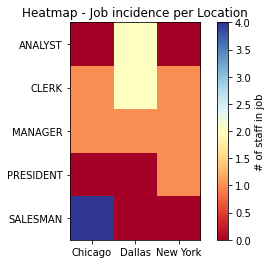

In [24]:
# Displaying dataframe as an heatmap 
# with diverging colourmap as RdYlBu 

df = pd.crosstab(hr['job'],hr['location'])
plt.imshow(df, cmap ="RdYlBu") 
  
# Displaying a color bar to understand 
# which color represents which range of data 
#plt.colorbar() 

cb = plt.colorbar()
cb.set_label('# of staff in job')

# Assigning labels of x-axis  
# according to dataframe 
plt.xticks(range(len(df.columns)), df.columns) 
  
# Assigning labels of y-axis  
# according to dataframe 
plt.yticks(range(len(df)), df.index) 
title_obj = plt.title('Heatmap - Job incidence per Location')  
# Displaying the figure 
plt.show() 

#.iplot(kind='heatmap', colorscale='Reds', title='Heatmap - Job incidence per Location', xTitle='Jobs', yTitle='Locations')

## Resources
Tutorial <a href="https://www.datacamp.com/community/tutorials/pandas-tutorial-dataframe-python">Pandas Tutorial: DataFrames in Python</a>

Comparison between Pandas and SQL (Pandas Documentation): <a href="https://pandas.pydata.org/pandas-docs/stable/getting_started/comparison/comparison_with_sql.html">Comparison with SQL</a>

Getting Started with Pandas (Pandas Documentation): <a href="https://pandas.pydata.org/pandas-docs/stable/getting_started/index.html">Getting Started</a>

This is perhaps an interesting resource for if you have a little more time: https://www.dataquest.io/blog/jupyter-notebook-tutorial/ .